### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. (2pts) Display the sample images

In [4]:
df = pd.read_csv("mnist_train_binary.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11335,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11336,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11337,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df.iloc[:, 0].values

In [6]:
X = df.iloc[:, 1:].values

In [7]:
X = np.reshape(X, newshape=(X.shape[0], 28, 28))

##### Normalize

In [9]:
X = X / 255.0

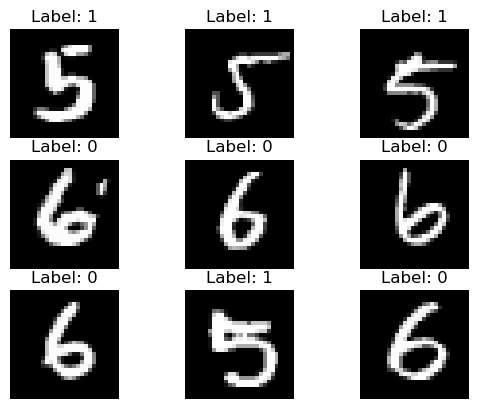

In [10]:
for i in range(9):
    plt.subplot(3, 3, (i + 1))
    plt.imshow(X[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

In [11]:
X = np.reshape(X, newshape=(X.shape[0], 784))

In [12]:
print(X.shape)

(11339, 784)


### 2. (5pts) Build Neural Network

In [14]:
!pip install torch torchvision torchaudio

In [15]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
torch.manual_seed(0)

In [16]:
def sigmoid(z):
    return 1.0 / (1.0 + torch.exp(-z))

In [17]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_layer=784, hidden_layer=100, output_layer=1):
        super(NeuralNetwork, self).__init__()

        self.W1 = nn.Parameter(torch.randn(input_layer, hidden_layer))
        self.b1 = nn.Parameter(torch.zeros(hidden_layer))
        self.W2 = nn.Parameter(torch.randn(hidden_layer, output_layer))
        self.b2 = nn.Parameter(torch.zeros(output_layer))

    def forward(self, x):
        z1 = x @ self.W1 + self.b1
        a1 = sigmoid(z1)
        
        z2 = a1 @ self.W2 + self.b2
        a2 = sigmoid(z2)
        
        return a2

model = NeuralNetwork()

In [18]:
in_64 = X[:64, :]
in_64_tensor = torch.tensor(in_64, dtype=torch.float32)

In [19]:
in_64_tensor.shape

torch.Size([64, 784])

In [20]:
out = model.forward(in_64_tensor)

In [21]:
print(out)

tensor([[9.2001e-01],
        [2.1043e-04],
        [9.9809e-01],
        [9.7942e-01],
        [8.9150e-01],
        [9.9667e-01],
        [6.3076e-01],
        [2.8362e-01],
        [1.0373e-01],
        [9.6768e-04],
        [7.8245e-01],
        [8.6754e-01],
        [3.7001e-01],
        [9.6391e-01],
        [9.9798e-01],
        [2.7702e-01],
        [1.7503e-01],
        [3.3276e-02],
        [6.4735e-01],
        [7.3990e-01],
        [1.8580e-03],
        [5.1556e-02],
        [1.0480e-02],
        [3.0749e-04],
        [9.9538e-04],
        [9.8881e-01],
        [7.3967e-01],
        [5.7079e-03],
        [9.6129e-01],
        [3.0863e-02],
        [9.3821e-01],
        [4.5954e-01],
        [9.5484e-01],
        [5.3747e-01],
        [1.0370e-01],
        [5.4575e-04],
        [9.6406e-01],
        [8.7770e-04],
        [9.9619e-01],
        [8.6039e-01],
        [3.5806e-01],
        [3.8310e-02],
        [2.1998e-01],
        [6.6496e-01],
        [5.1349e-02],
        [1

In [22]:
print(out.shape)

torch.Size([64, 1])


In [23]:
out.view(-1)

tensor([9.2001e-01, 2.1043e-04, 9.9809e-01, 9.7942e-01, 8.9150e-01, 9.9667e-01,
        6.3076e-01, 2.8362e-01, 1.0373e-01, 9.6768e-04, 7.8245e-01, 8.6754e-01,
        3.7001e-01, 9.6391e-01, 9.9798e-01, 2.7702e-01, 1.7503e-01, 3.3276e-02,
        6.4735e-01, 7.3990e-01, 1.8580e-03, 5.1556e-02, 1.0480e-02, 3.0749e-04,
        9.9538e-04, 9.8881e-01, 7.3967e-01, 5.7079e-03, 9.6129e-01, 3.0863e-02,
        9.3821e-01, 4.5954e-01, 9.5484e-01, 5.3747e-01, 1.0370e-01, 5.4575e-04,
        9.6406e-01, 8.7770e-04, 9.9619e-01, 8.6039e-01, 3.5806e-01, 3.8310e-02,
        2.1998e-01, 6.6496e-01, 5.1349e-02, 1.0571e-01, 5.5262e-01, 9.7762e-01,
        8.6120e-01, 3.0163e-01, 2.3370e-01, 1.2885e-01, 8.9747e-01, 9.9371e-01,
        1.5385e-04, 5.4595e-01, 8.2553e-01, 7.2756e-01, 4.8860e-01, 1.3091e-03,
        5.5140e-01, 9.9782e-01, 2.3399e-02, 4.6920e-01],
       grad_fn=<ViewBackward0>)